In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
raw_data_path=os.path.join(os.path.pardir, 'data', 'raw')
train_file_path=os.path.join(raw_data_path, 'train.csv')
test_file_path=os.path.join(raw_data_path, 'test.csv')

In [3]:
# read the data with all default parameters
train_df=pd.read_csv(train_file_path, index_col='PassengerId')
test_df=pd.read_csv(test_file_path, index_col='PassengerId')

In [4]:
# get the type
type(train_df)

pandas.core.frame.DataFrame

### Basic Structure

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
test_df.info()
# Survived column is not present, it needs to be predicted based on training data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [7]:
test_df['Survived']=-888  # adding Survived column with default values

In [8]:
# now join train and test data. Columns are same 
df = pd.concat((train_df, test_df))

C:\Users\simra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [10]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [11]:
df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742


In [12]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,-888,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,-888,SOTON/O.Q. 3101262
1308,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,-888,359309
1309,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,3,male,1,-888,2668


In [13]:
# Selection
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [14]:
df['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [15]:
df[['Name', 'Age']]

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
6,"Moran, Mr. James",NaN
7,"McCarthy, Mr. Timothy J",54.0
8,"Palsson, Master. Gosta Leonard",2.0
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0


In [16]:
# Indexing
# use loc for label based indexing
df.loc[5:10,]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1,237736


In [17]:
df.loc[5:10, 'Age':'Pclass']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass
PassengerId,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2


In [18]:
df.loc[5:10, ['Age', 'Cabin', 'Survived']]

,Age,Cabin,Survived
PassengerId,,,
5,35.0,NaN,0
6,NaN,NaN,0
7,54.0,E46,0
8,2.0,NaN,0
9,27.0,NaN,1
10,14.0,NaN,1


In [19]:
# use iloc for position based testing
df.iloc[5:10, 3:8]

,Fare,Name,Parch,Pclass,Sex
PassengerId,,,,,
6,8.4583,"Moran, Mr. James",0,3,male
7,51.8625,"McCarthy, Mr. Timothy J",0,1,male
8,21.0750,"Palsson, Master. Gosta Leonard",1,3,male
9,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female
10,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female


In [20]:
# Filtering
# filter rows based on the conditions
male_passengers = df.loc[df.Sex == 'male',:]
print('Number of male passenger: {}'.format(len(male_passengers)))

Number of male passenger: 843


In [21]:
male_passengers_first_class = df.loc[((df.Sex == 'male') & (df.Pclass == 1)),:]
print('Number of male passengers in First class {}'.format(len(male_passengers_first_class)))

Number of male passengers in First class 179


### Summary Statistics

In [22]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [23]:
# numerical features
# centrality measures
print('Mean fare : {0}'.format(df.Fare.mean()))

Mean fare : 33.2954792813456


In [24]:
print('Median fare : {0}'.format(df.Fare.median()))

Median fare : 14.4542


In [25]:
# dispersion measures
print('Mean fare : {0}'.format(df.Fare.min()))
print('Max fare : {0}'.format(df.Fare.max()))
print('Fare range : {0}'.format(df.Fare.max() - df.Fare.min()))
print('25 percentile : {0}'.format(df.Fare.quantile(.25)))
print('50 percentile : {0}'.format(df.Fare.quantile(.50)))
print('75 percentile : {0}'.format(df.Fare.quantile(.75)))
print('Variance fare : {0}'.format(df.Fare.var()))
print('Standard deviation fare : {0}'.format(df.Fare.std()))

Mean fare : 0.0
Max fare : 512.3292
Fare range : 512.3292
25 percentile : 7.8958
50 percentile : 14.4542
75 percentile : 31.275
Variance fare : 2678.959737892894
Standard deviation fare : 51.75866823917414


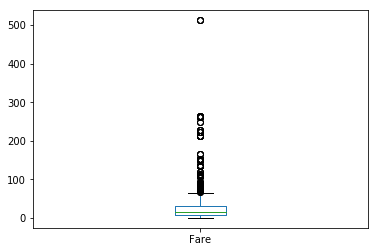

In [26]:
%matplotlib inline 
# box - whisker plot
df.Fare.plot(kind='box')

In [27]:
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [28]:
# Categorical columns - Counts
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [29]:
# Categorical columns - Proportions
df.Sex.value_counts(normalize = True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [30]:
df[df.Survived !=-888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [31]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

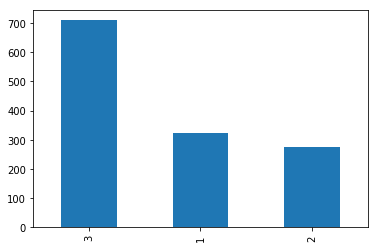

In [32]:
df.Pclass.value_counts().plot(kind = 'bar')

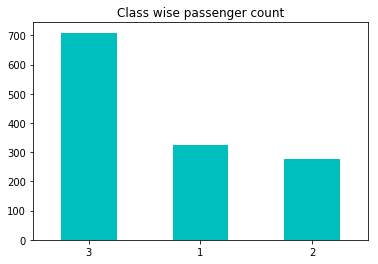

In [33]:
df.Pclass.value_counts().plot(kind = 'bar', rot = 0, title = 'Class wise passenger count', color = 'c')

### Distributions

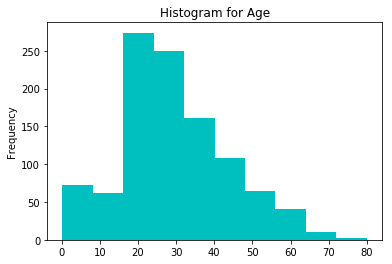

In [34]:
#Univariate:
# Histogram
df.Age.plot(kind='hist', title='Histogram for Age', color='c')

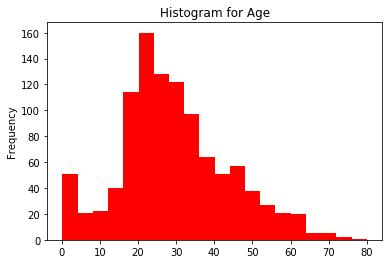

In [35]:
# Bins
df.Age.plot(kind='hist', title='Histogram for Age', color='r', bins=20)

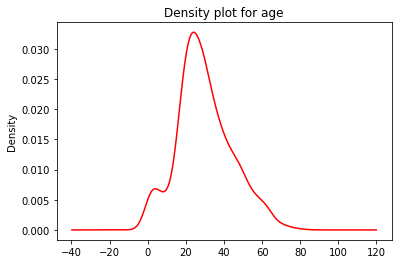

In [36]:
# kde (Kernel Density Estimation) for density plot
df.Age.plot(kind='kde', title='Density plot for age', color='r')

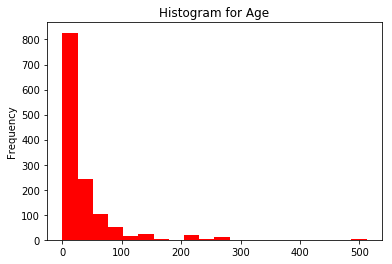

In [37]:
# Histogram for fare
df.Fare.plot(kind='hist', title='Histogram for Age', color='r', bins=20)

In [38]:
print('Skewness for Age: {0: .2f}'.format(df.Age.skew()))
print('Skewness for Fare: {0: .2f}'.format(df.Fare.skew()))

Skewness for Age:  0.41
Skewness for Fare:  4.37


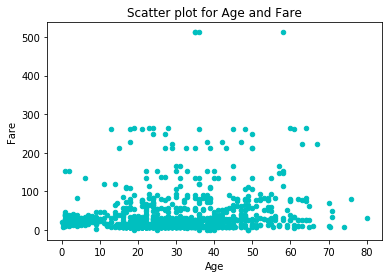

In [39]:
# Bivariate:
# Scatter Plot
df.plot.scatter(x='Age', y='Fare', color='c', title='Scatter plot for Age and Fare')

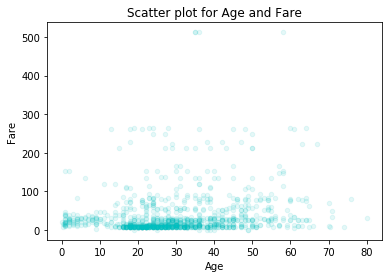

In [40]:
# Use alpha to set transparency
df.plot.scatter(x='Age', y='Fare', color='c', title='Scatter plot for Age and Fare', alpha=0.1)

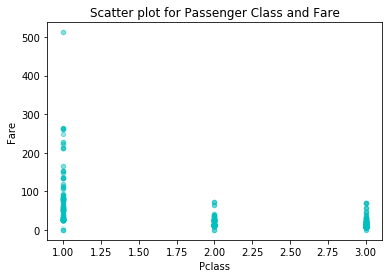

In [41]:
df.plot.scatter(x='Pclass', y='Fare', color='c', title='Scatter plot for Passenger Class and Fare', alpha=0.15)

### Grouping and Aggregations

In [42]:
# group by
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [43]:
df.groupby('Pclass').Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [44]:
df.groupby('Pclass').Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [45]:
df.groupby(['Pclass'])['Fare', 'Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [46]:
# Aggregations
df.groupby(['Pclass']).agg({'Fare': 'mean', 'Age': 'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [47]:
# more complicated aggregations
aggregations = {
    'Fare': {
          'mean_Fare': 'mean',
          'median_Fare': 'median',
          'max_Fare': max,
          'min_Fare': np.min
         },
    'Age': {
          'median_Age': 'median',
          'min_Age': min,
          'max_Age': max,
          'range_Age': lambda x: max(x) - min(x)
          }
}

In [48]:
df.groupby(['Pclass']).agg(aggregations)

C:\Users\simra\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age                  \
        mean_Fare median_Fare  max_Fare min_Fare median_Age min_Age max_Age   
Pclass                                                                        
1       87.508992     60.0000  512.3292      0.0       39.0    0.92    80.0   
2       21.179196     15.0458   73.5000      0.0       29.0    0.67    70.0   
3       13.302889      8.0500   69.5500      0.0       24.0    0.17    74.0   

                  
       range_Age  
Pclass            
1          79.08  
2          69.33  
3          73.83

In [49]:
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [50]:
# Crosstabs
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


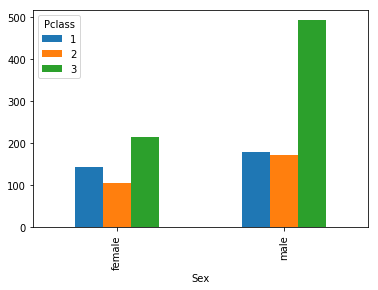

In [51]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar')

In [52]:
# Pivot table
df.pivot_table(index='Sex', columns='Pclass', values='Age', aggfunc='mean')


Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [53]:
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [54]:
df.groupby(['Sex', 'Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


### Data Munging: Working with Missing Values

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [56]:
# Feature: Embarked
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [57]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [58]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [59]:
# impute the missing value with 'S'
# df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
# OR
# df.Embarked.fillna('S', inplace=True)

In [60]:
# Option 2: Explore the fare for each embarked point
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [61]:
df.Embarked.fillna('C', inplace=True)

In [62]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [64]:
# Feature: Fare
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [69]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'), 'Fare'].median()
print(median_fare)

8.05


In [70]:
df.Fare.fillna(median_fare, inplace = True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [72]:
# Feature: Age
# set maximum number of rows to be displayed
pd.options.display.max_rows = 15

In [73]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1,PC 17569
...,...,...,...,...,...,...,...,...,...,...,...
1274,NaN,NaN,S,14.5000,"Risien, Mrs. Samuel (Emma)",0,3,female,0,-888,364498


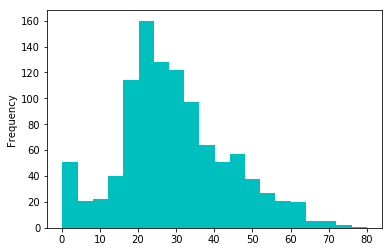

In [74]:
# Option 1: replace with mean value
df.Age.plot(kind='hist', bins=20, color='c')

In [75]:
df.Age.mean()

29.881137667304014

In [77]:
# Issue: due to few high values of 70's and 80's, pushing the overall mean
# df.Age.fillna(df.Age.mean(), inpolace = True)

In [81]:
# Option 2: replace with median age of gender
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

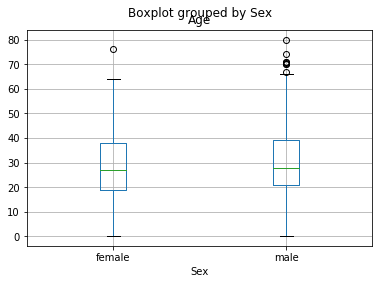

In [82]:
df[df.Age.notnull()].boxplot('Age', 'Sex')

In [83]:
# age_sex_median = df.groupby('Sex').Age.transform('median')
# df.Age.fillna(age_sex_median, inplace = True)

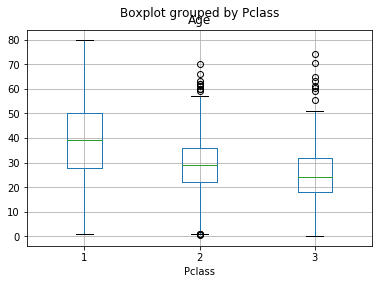

In [84]:
# Option 3: replace with median age of Pclass
df[df.Age.notnull()].boxplot('Age', 'Pclass')

In [85]:
# pclass_age_median = df.groupby('Pclass').Age.transform('median')
# df.Age.fillna(pclass_age_median, inplace = True)

In [86]:
# Option 4: by title
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
                              ...                        
1303      Minahan, Mrs. William Edward (Lillian E Thorpe)
1304                       Henriksson, Miss. Jenny Lovisa
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [87]:
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [88]:
# use map function to apply the function on each name in df rows
df.Name.map(lambda x : GetTitle(x))
# OR
# df.Name.map(GetTitle)

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
6           mr
7           mr
         ...  
1303       mrs
1304      miss
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [89]:
df.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [90]:
def GetTitle(name):
    title_group = { 'mr': 'Mr',
                   'mrs': 'Mrs',
                   'miss': 'Miss',
                   'master': 'Master',
                   'don': 'Sir',
                   'rev': 'Sir',
                   'dr': 'Officer',
                   'mme': 'Mrs',
                   'ms': 'Mrs',
                   'major': 'Officer',
                   'lady': 'Lady',
                   'sir': 'Sir',
                   'mlle': 'Miss',
                   'col': 'Officer',
                   'capt': 'Officer',
                   'the countess': 'Lady',
                   'jonkheer': 'Sir',
                   'dona': 'Lady'                  
    }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [91]:
# create new feature/column 'Title'
df['Title'] = df.Name.map(lambda x : GetTitle(x))

In [92]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


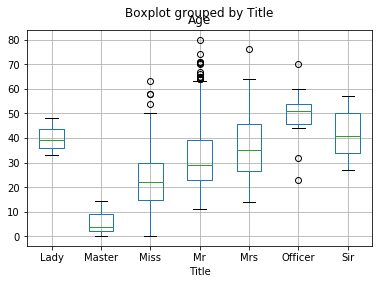

In [93]:
df[df.Age.notnull()].boxplot('Age', 'Title')

In [94]:
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median, inplace = True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


### Working with Outliers

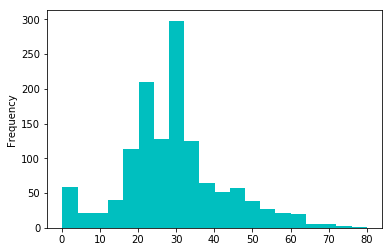

In [96]:
# Age
df.Age.plot(kind = 'hist', bins = 20, color = 'c')

In [97]:
df.loc[df.Age>70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,Mrs


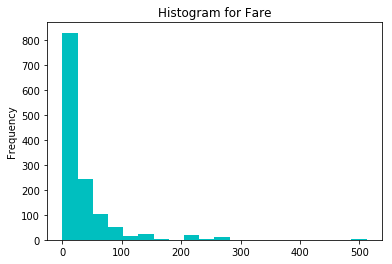

In [98]:
# Fare
df.Fare.plot(kind = 'hist', bins = 20, title = 'Histogram for Fare', color = 'c')

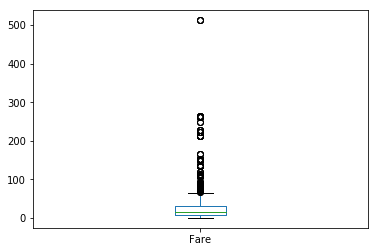

In [99]:
df.Fare.plot(kind = 'box')

In [100]:
df.loc[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs


In [101]:
# Transformation to reduce skewness for Fare data 
LogFare = np.log(df.Fare + 1.0)

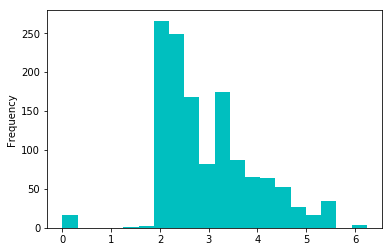

In [102]:
LogFare.plot(kind = 'hist', bins = 20, color = 'c')

In [103]:
# Binning
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
6         (7.896, 14.454]
7       (31.275, 512.329]
              ...        
1303    (31.275, 512.329]
1304      (-0.001, 7.896]
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [104]:
# discretization
pd.qcut(df.Fare, 4, labels = ['very low', 'low', 'high', 'very high'])

PassengerId
1        very low
2       very high
3             low
4       very high
5             low
6             low
7       very high
          ...    
1303    very high
1304     very low
1305          low
1306    very high
1307     very low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very low < low < high < very high]

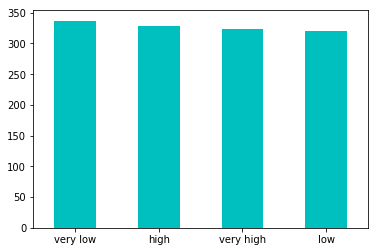

In [105]:
pd.qcut(df.Fare, 4, labels = ['very low', 'low', 'high', 'very high']).value_counts().plot(kind = 'bar', color = 'c', rot=0)

In [106]:
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels = ['very low', 'low', 'high', 'very high'])

In [107]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin
PassengerId,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr,very low
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs,very high
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss,low
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs,very high
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr,low


## Feature Engineering

In [109]:
# Feature: Age State (Adult or Child)
df['AgeState'] = np.where(df['Age']>=18, 'Adult', 'Child')

In [110]:
df['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [111]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


In [112]:
# Feature: Family Size
# Adding parents with siblings
df['FamilySize']= df.Parch + df.SibSp + 1 # + 1 for self

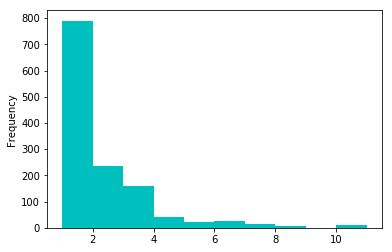

In [113]:
df['FamilySize'].plot(kind='hist', color = 'c')

In [115]:
df.loc[df.FamilySize == df.FamilySize.max(), ['Name', 'Survived', 'FamilySize', 'Ticket']]

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343
202,"Sage, Mr. Frederick",0,11,CA. 2343
325,"Sage, Mr. George John Jr",0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0,11,CA. 2343
847,"Sage, Mr. Douglas Bullen",0,11,CA. 2343
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343
1080,"Sage, Miss. Ada",-888,11,CA. 2343
1234,"Sage, Mr. John George",-888,11,CA. 2343


In [116]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [117]:
# Feature: IsMother
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title != 'Miss')), 1, 0)

In [118]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


In [120]:
# Deck (Cabin)
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [122]:
df.loc[df.Cabin == 'T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,Mr,very high,Adult,1,0


In [124]:
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN

In [125]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [128]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(),'Z')
df['Deck'] = df['Cabin'].map(lambda x : get_deck(x))

In [129]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [130]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age           1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int32
Deck          1309 non-null object
dtypes: category(1), float64(2), int32(1), int64(5), object(8)
memory usage: 210.2+ KB


In [132]:
# Categorical Feature Encoding
# sex
df['IsMale'] = np.where(df['Sex'] == 'male', 1, 0)

In [134]:
# Deck, Pclass, Title, Fare_Bin, Embarked, AgeState
df = pd.get_dummies(df, columns=['Deck', 'Pclass', 'Title', 'Fare_Bin', 'Embarked', 'AgeState'])

In [136]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcla

In [137]:
# Drop columns
df.drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis = 1, inplace = True)

In [138]:
# Reorder columns
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_M